In [58]:
import notebook_env
import importlib
importlib.reload(notebook_env)
from notebook_env import *

In [59]:
dirs = glob('results/*CIFAR*[*Adjoint*')
dirs = sorted(dirs, key = lambda x : os.stat(x).st_mtime)[:]
results = { name: torch.load(name) for name in dirs }
dirs

['results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-euler-4-1.0-1-piecewise-LEARN-0.1-160-[]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-rk4_classic-4-1.0-1-piecewise-LEARN-0.1-160-[]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-euler-8-1.0-1-piecewise-LEARN-0.1-160-[]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-rk4_classic-8-1.0-1-piecewise-LEARN-0.1-160-[]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-euler-1-1.0-1-piecewise-LEARN-0.1-160-[20, 40]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-rk4_classic-1-1.0-1-piecewise-LEARN-0.1-160-[20, 40]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-ode-NoSkip-euler-1-1.0-1-piecewise-LEARN-0.1-160-[20, 40, 60]-0.1-Adjoint-NormalInit-SEED-1.pkl',
 'results/odene

In [60]:
df = pd.DataFrame(columns=["scheme", "variant", "time_d","refine epochs","final_time_d","depth","nsteps","accuracy","final time/epoch (S)", "total time (m)"])
for name, result in results.items():
    args = PostPack(name)
    if len(result.test_acc) < 159:
        acc = np.nan
    else:
        acc = max(list(zip(*result.test_acc))[1])
    if not args.use_skip_init:
        var = "BatchNorm"
    else:
        var = "SkipInit"
    df.loc[len(df)] = \
        [args.scheme, var, args.initial_time_d, args.refine, args.final_time_d, args.final_time_d*2*3 + 1 + 2 + 2 + 1,
                    args.n_steps_per, acc, result.epoch_times[-1], sum(result.epoch_times)/60.0]
df

,scheme,variant,time_d,refine epochs,final_time_d,depth,nsteps,accuracy,final time/epoch (S),total time (m)
0,euler,BatchNorm,4,[],4,30,1,0.8669,32.305450,87.268580
1,rk4_classic,BatchNorm,4,[],4,30,1,NaN,89.090300,96.517665
2,euler,BatchNorm,8,[],8,54,1,0.9224,62.995326,171.306123
3,rk4_classic,BatchNorm,8,[],8,54,1,0.9260,258.293969,577.366770
4,euler,BatchNorm,1,"[20, 40]",4,30,1,NaN,15.852329,1.574465
5,rk4_classic,BatchNorm,1,"[20, 40]",4,30,1,0.9244,67.393764,155.319298
6,euler,BatchNorm,1,"[20, 40, 60]",8,54,1,NaN,15.723337,1.330887
7,rk4_classic,BatchNorm,1,"[20, 40, 60]",8,54,1,0.9290,126.976346,258.925821
8,euler,BatchNorm,4,[],4,30,2,0.9224,69.930967,188.279790
9,rk4_classic,BatchNorm,4,[],4,30,2,0.9249,209.533688,531.182906


In [64]:
df.loc[df.variant=="SkipInit"].sort_values('scheme')[["scheme", "time_d", "nsteps", "accuracy", "final time/epoch (S)"]]

,scheme,time_d,nsteps,accuracy,final time/epoch (S)
14,euler,4,1,NaN,24.541332
15,euler,4,2,NaN,43.666349
18,euler,4,3,0.9227,61.385696
20,euler,4,4,0.9170,81.331071
21,euler,8,1,NaN,42.570086
23,euler,8,2,0.9102,81.421446
25,euler,8,3,0.9149,123.477703
28,euler,8,4,0.9169,157.355878
13,rk4_classic,4,1,NaN,85.704031
16,rk4_classic,4,2,0.9197,135.311270


In [63]:
df.loc[df.variant=="BatchNorm"].sort_values('scheme')[["scheme", "time_d","refine epochs","final_time_d", "nsteps", "accuracy", "final time/epoch (S)"]]

,scheme,time_d,refine epochs,final_time_d,nsteps,accuracy,final time/epoch (S)
0,euler,4,[],4,1,0.8669,32.305450
19,euler,8,[],8,2,0.9278,121.584247
12,euler,4,[],4,4,0.9246,133.119221
10,euler,4,[],4,3,0.9291,102.239555
6,euler,1,"[20, 40, 60]",8,1,NaN,15.723337
8,euler,4,[],4,2,0.9224,69.930967
4,euler,1,"[20, 40]",4,1,NaN,15.852329
2,euler,8,[],8,1,0.9224,62.995326
26,euler,8,[],8,3,0.9286,178.643413
7,rk4_classic,1,"[20, 40, 60]",8,1,0.9290,126.976346


In [19]:
print(df.sort_values('time_d').sort_values('scheme').to_latex(index=False))

\begin{tabular}{lllllr}
\toprule
      scheme & time\_d & final\_time\_d & nsteps & accuracy &  time/epoch (S) \\
\midrule
       euler &      1 &            4 &      1 &      NaN &       15.852329 \\
       euler &      1 &            8 &      1 &      NaN &       15.723337 \\
       euler &      4 &            4 &      1 &   0.8669 &       32.305450 \\
       euler &      4 &            4 &      2 &   0.9224 &       69.930967 \\
       euler &      4 &            4 &      3 &   0.9291 &      102.239555 \\
       euler &      4 &            4 &      4 &   0.9246 &      133.119221 \\
       euler &      8 &            8 &      1 &   0.9224 &       62.995326 \\
 rk4\_classic &      1 &            4 &      1 &   0.9244 &       67.393764 \\
 rk4\_classic &      1 &            8 &      1 &    0.929 &      126.976346 \\
 rk4\_classic &      4 &            4 &      1 &      NaN &       89.090300 \\
 rk4\_classic &      4 &            4 &      2 &   0.9249 &      209.533688 \\
 rk4\_classic &

In [10]:
eu=df[df.var===='euler'].sort_values('time_d')
rk=df[df.scheme=='rk4_classic'].sort_values('time_d')
eu, rk

(   scheme time_d final_time_d nsteps accuracy  time/epoch (S)
 4   euler      1            4      1      NaN       15.852329
 6   euler      1            8      1      NaN       15.723337
 0   euler      4            4      1   0.8669       32.305450
 8   euler      4            4      2   0.9224       69.930967
 10  euler      4            4      3   0.9291      102.239555
 12  euler      4            4      4   0.9246      133.119221
 2   euler      8            8      1   0.9224       62.995326,
          scheme time_d final_time_d nsteps accuracy  time/epoch (S)
 5   rk4_classic      1            4      1   0.9244       67.393764
 7   rk4_classic      1            8      1    0.929      126.976346
 1   rk4_classic      4            4      1      NaN       89.090300
 9   rk4_classic      4            4      2   0.9249      209.533688
 11  rk4_classic      4            4      3   0.9252      303.604205
 3   rk4_classic      8            8      1    0.926      258.293969)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

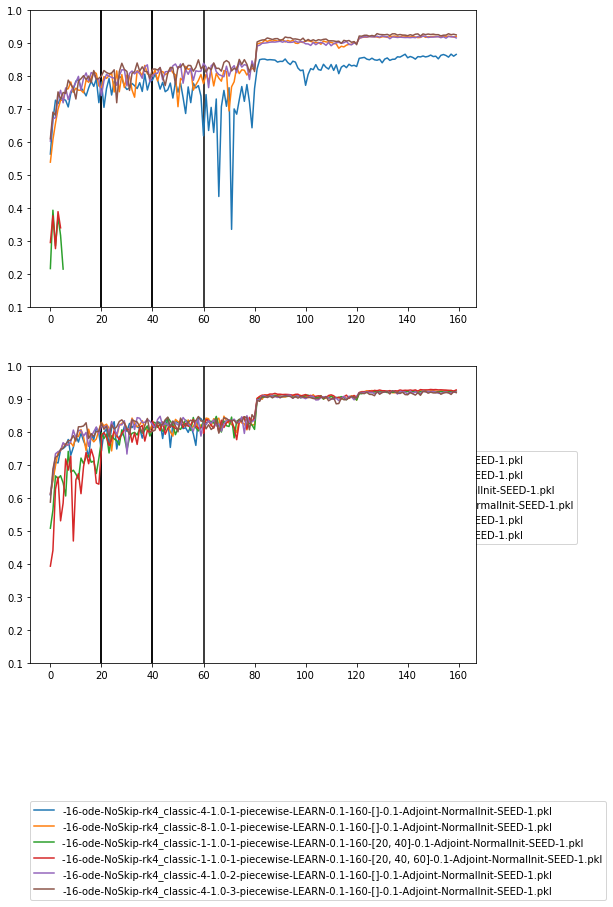

In [5]:
plt.figure(figsize=(8,12))
for name, result in results.items():
    #plt.plot(result.train_acc, label=legend_name(name))
    args = PostPack(name)
    x,y = zip(*result.test_acc)
    #plt.figure()
    if "euler" in name:
        horiz = 0
    else:
        horiz = 1
    plt.subplot(2,1,horiz+1)
    plt.plot(x,y, '-', label=legend_name(name))
    try:
        x,y = zip(*result.train_acc)
        plt.plot(x,y, '--', label=legend_name(name))
    except: pass
    plt.vlines(args.refine,0,1)
    plt.ylim(0.1,1)
    plt.legend(loc=(0,-0.8))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlie

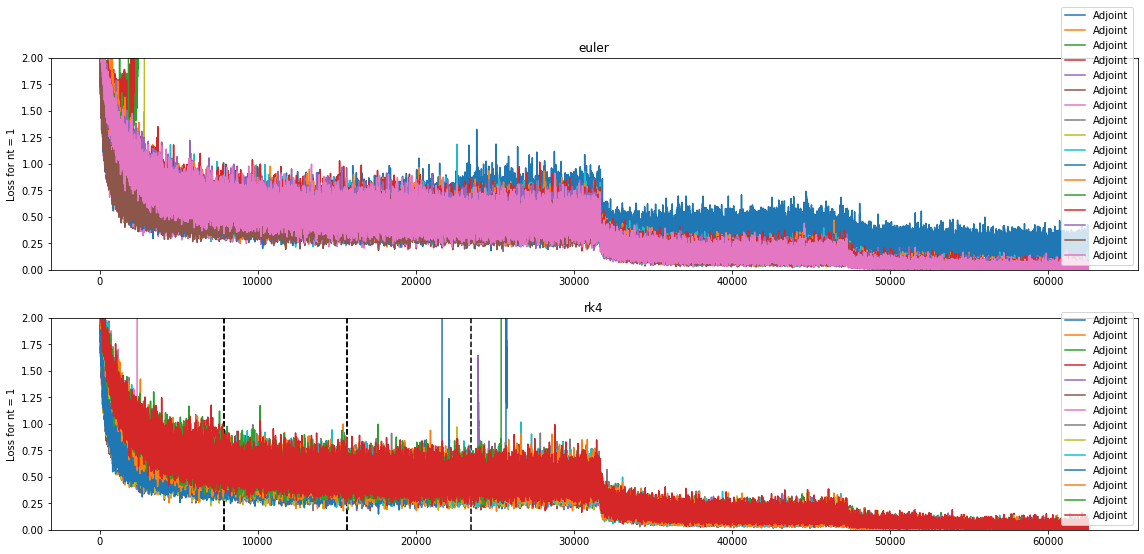

In [65]:
plt.figure(figsize=(16,8))
for i,(name, result) in enumerate(results.items()):
    pack = PostPack(name)
    if "euler" in name:
        horiz = 0
    else:
        horiz = 1
    vert = 0
    plt.subplot(2,1,1+horiz+2*vert)
    #plt.figure()
    if horiz==0 and vert==0:
        plt.title("euler")
    if horiz==1 and vert==0:
        plt.title("rk4")
    if vert==2:
        plt.xlabel("step number")
    plt.ylabel(f"Loss for nt = { vert+1}")
    plt.plot(result.losses,
             '-' if "Adjoint" in name else ',',
             label="Adjoint" if "Adjoint" in name else "Backprop")
    plt.vlines(result.refine_steps, 0,2, linestyle='dashed')
    plt.legend()
    plt.ylim(0.,2)
plt.tight_layout()
